# ¿Cómo viajan los turistas en España?

In [60]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

# ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno?

In [61]:
turismo = pd.read_excel("./src/data/tourism_dataset.xlsx") #Importa Dataset de la carpeta src
turismo=pd.DataFrame(turismo) #Convierte a formato Dataframe

#Creo un dataframe aparte para limpiar el nombre de las columnas
reemplazo_comunidad=turismo[" "].str.split(expand=True)
reemplazo_comunidad= reemplazo_comunidad.drop(columns = [0, 2, 3, 4])
#reemplazo_comunidad

#Union entre el datafram principal y el datafram de nombres limpios
turismo= pd.concat([turismo, reemplazo_comunidad], axis=1)
turismo = turismo.rename(columns={1: 'Comunidad'}) #Renombra la columna recien concatenada
turismo= turismo.drop(columns = [" "]) #Elimina la columna original 

#Numeros y caracteres innecesarios en las fechas
turismo.columns=turismo.columns.str.replace("M", " ")
turismo.columns=turismo.columns.str.replace(".5", "")
turismo.columns=turismo.columns.str.replace(".4", "")
turismo.columns=turismo.columns.str.replace(".3", "")
turismo.columns=turismo.columns.str.replace(".2", "")
turismo.columns=turismo.columns.str.replace(".1", "")

turismo = turismo.set_index("Comunidad") #Nuevo indice seranlos nombres de las comunidades
turismo = turismo.transpose() #Se revierte el orden para poner las fechas como indices

#Convertir los valores a STR para poder reemplazar simbolos y luego convertir a formato numerico
turismo = turismo.astype(str)
turismo = turismo.replace('\\.', '', regex=True)
turismo = turismo.replace(',', '.', regex=True)  # Cambia comas por puntos
turismo = turismo.apply(pd.to_numeric, errors='coerce')

turismo = turismo.loc[:, ~turismo.columns.duplicated()]#Elimina columnas duplicadas
turismo = turismo[~turismo.index.duplicated(keep='first')]

nuevo_índice = pd.to_datetime(turismo.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
turismo.index = nuevo_índice #Actualizo el indice en el Dataframe principal
turismo = turismo.sort_index()  # Ordena en ascendente

def estacion(df = turismo, año = 2024, comunidades=("Madrid",), temporadas=("invierno",)): #Funcion para filtrar el Dataframe
    '''
    Filtra el DataFrame principal con:
    - Rango de años.
    - Ciudades Seleccionadas en España.
    - Temporadas Seleccionadas.

    P/ejem: 
    estacion(turismo, (2020, 2024), ["Madrid", "Barcelona"], ("invierno", "primavera"))
    '''
    
    temporada_dict={ 
        "primavera":(3,4,5),
        "verano" : (6,7,8),
        "otoño" : (9,10,11),
        "invierno" : (12, 1, 2)}
    
    meses = sum((temporada_dict[temporada] for temporada in temporadas), ())
    
    if isinstance(comunidades, str):
        comunidades = [comunidades]
    filtro = (
        (df.index.strftime('%Y').astype(int) >= año[0]) &
        (df.index.strftime('%Y').astype(int) <= año[1]) &
        (df.index.strftime('%m').astype(int).isin(meses))
    )
    
    # Devuelve el DataFrame filtrado para las comunidades seleccionadas
    return df.loc[filtro, comunidades]

# COVID

In [62]:
pre_covid = estacion(turismo, año=(2017, 2019), comunidades="Madrid", temporadas=("primavera","verano", "otoño", "invierno"))
covid = estacion(turismo, año=(2020, 2021), comunidades="Madrid", temporadas=("primavera","verano", "otoño", "invierno"))
post_covid = estacion(turismo, año=(2022, 2024), comunidades="Madrid", temporadas=("primavera","verano", "otoño", "invierno"))

<Axes: >

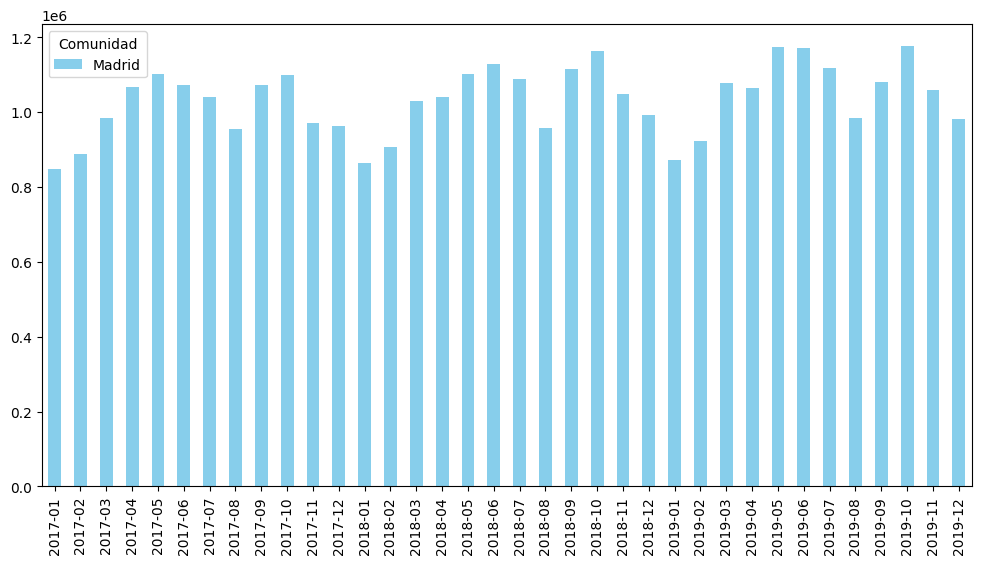

In [63]:
pre_covid.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')

In [86]:
prueba = pd.concat([pre_covid, covid, post_covid], axis=1)

In [87]:
prueba

Comunidad,Madrid,Madrid,Madrid
2017-01,847583.0,NaN,NaN
2017-02,887678.0,NaN,NaN
2017-03,983876.0,NaN,NaN
2017-04,1067032.0,NaN,NaN
2017-05,1102462.0,NaN,NaN
...,...,...,...
2024-08,NaN,NaN,1032666.0
2024-09,NaN,NaN,1193454.0
2024-10,NaN,NaN,1225971.0
2024-11,NaN,NaN,1124406.0


<Axes: >

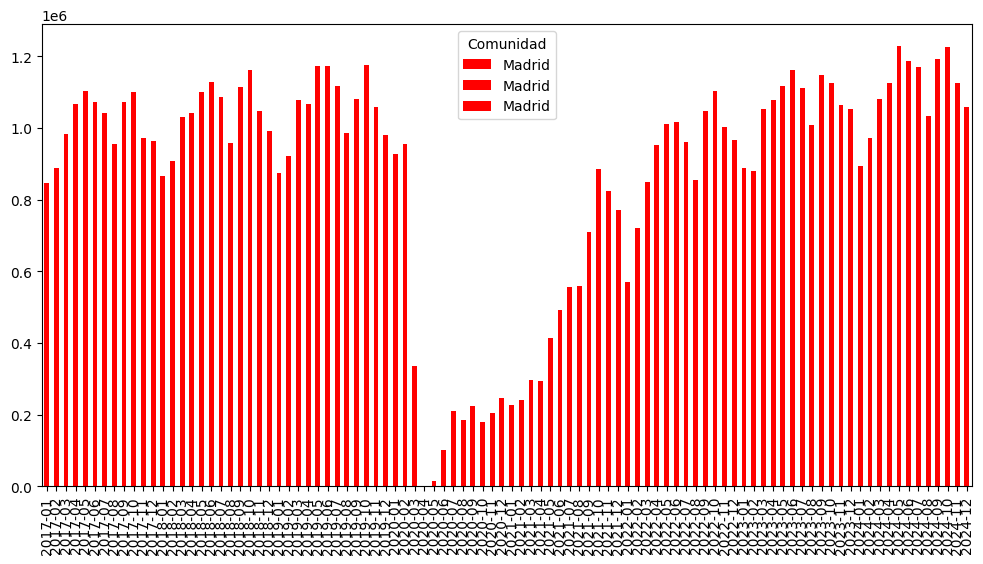

In [88]:
prueba.plot(kind='bar', stacked=True, figsize=(12, 6), color='red')

<Axes: >

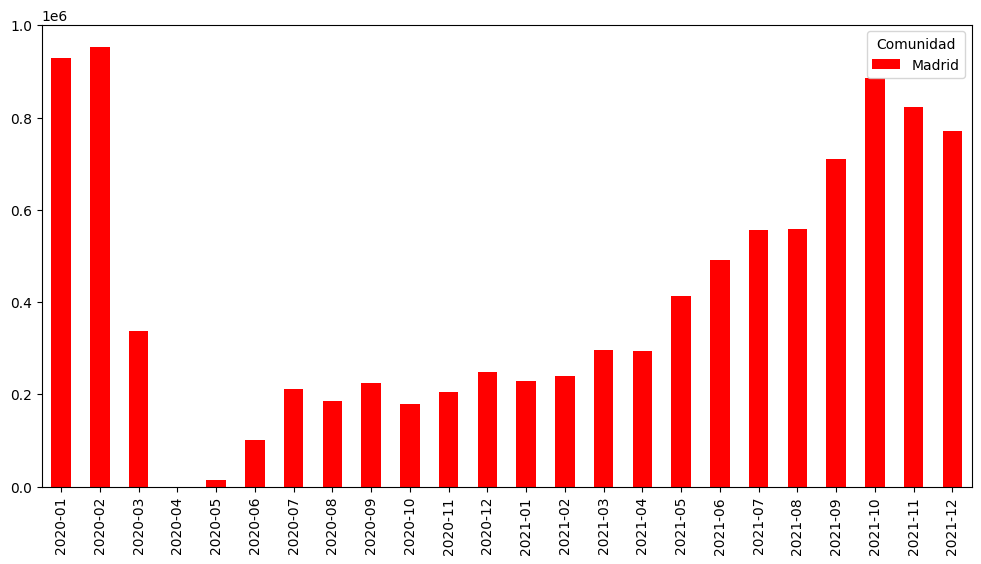

In [64]:
covid.plot(kind='bar', stacked=True, figsize=(12, 6), color='red')

<Axes: >

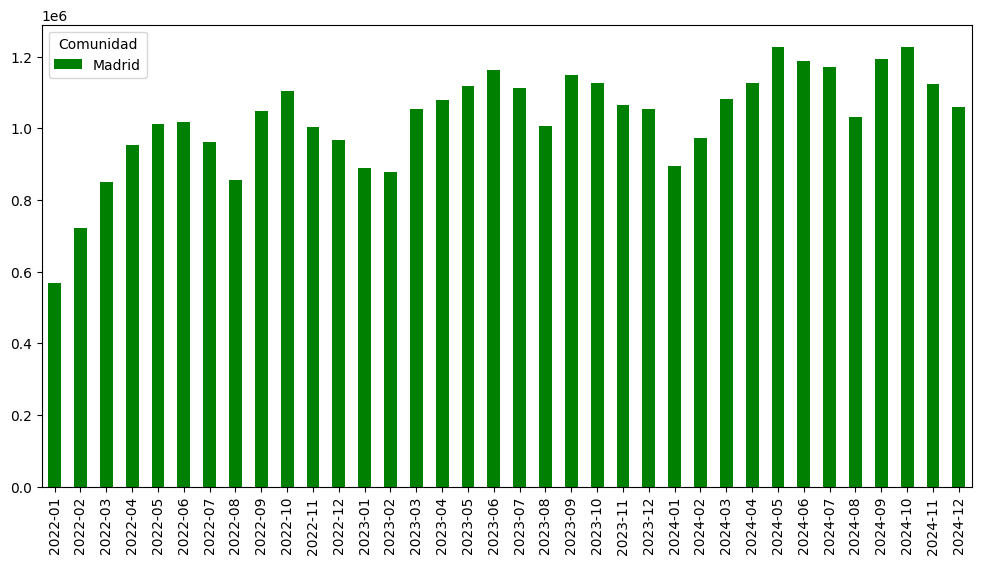

In [65]:
post_covid.plot(kind='bar', stacked=True, figsize=(12, 6), color='green')

# VERANO

In [66]:
# turismo.columns

<Axes: >

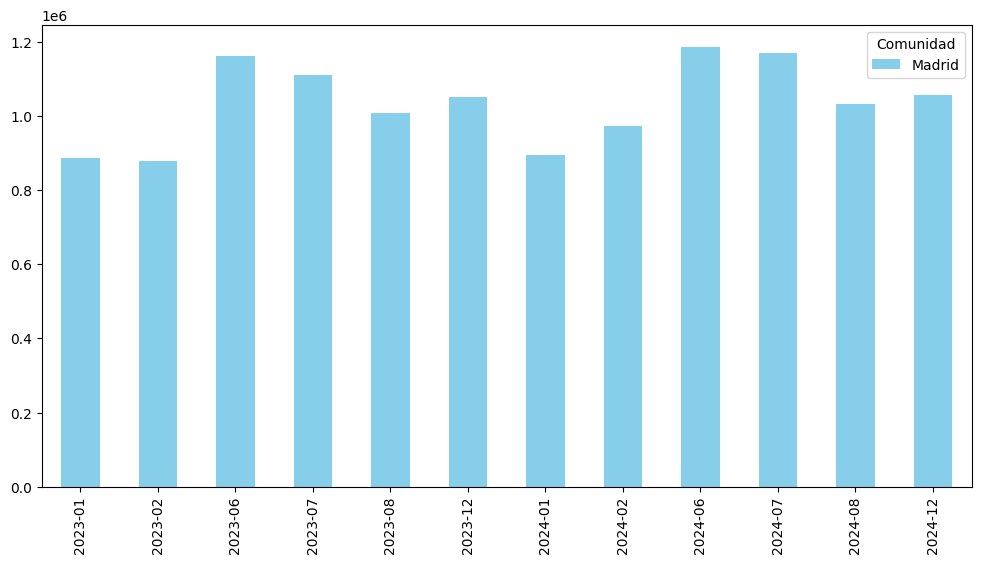

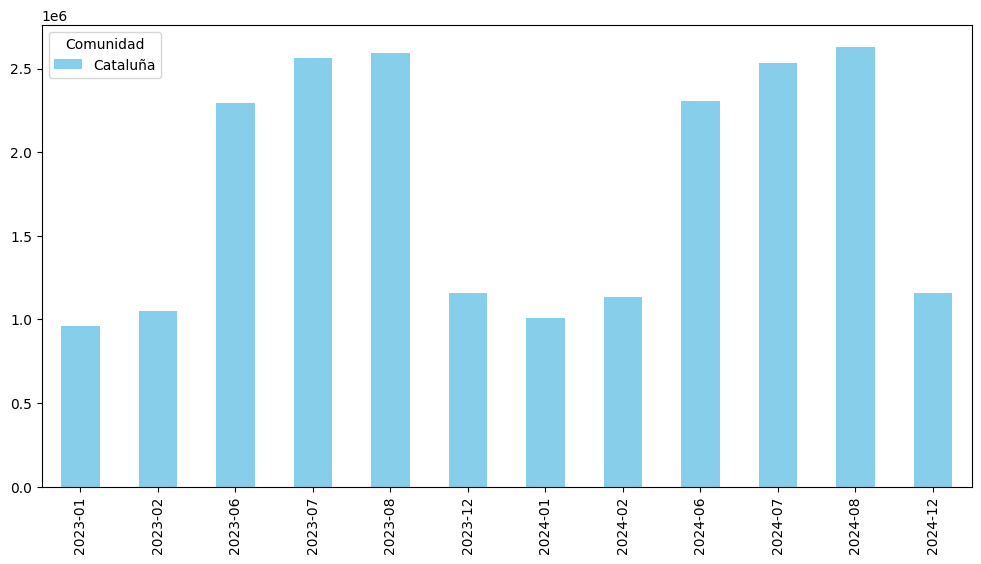

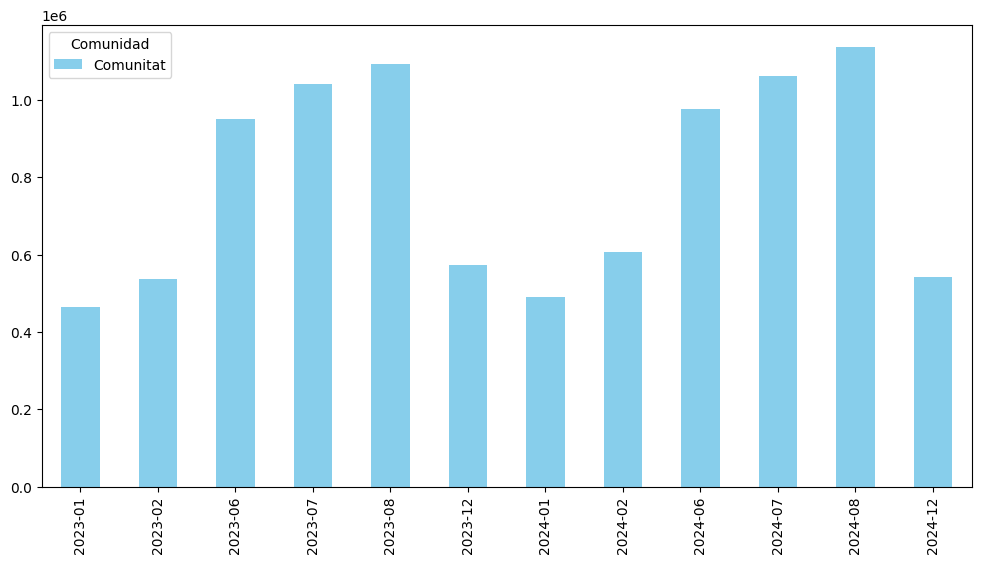

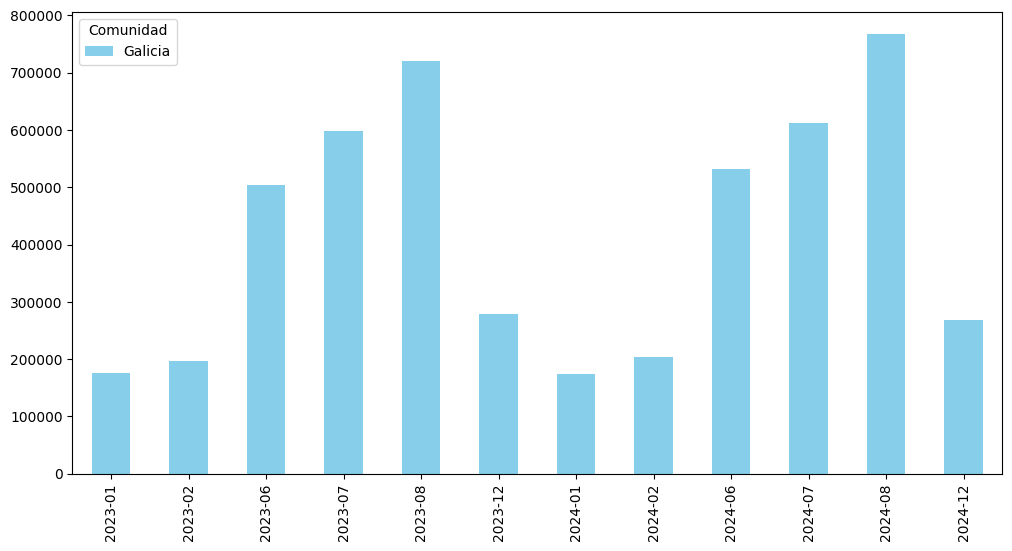

In [67]:
verano_madrid = estacion(turismo, año=(2023, 2024), comunidades="Madrid", temporadas=("verano", "invierno"))
verano_madrid.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')

verano_barcelona = estacion(turismo, año=(2023, 2024), comunidades="Cataluña", temporadas=("verano", "invierno"))
verano_barcelona.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')

verano_valencia = estacion(turismo, año=(2023, 2024), comunidades="Comunitat", temporadas=("verano", "invierno"))
verano_valencia.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')

verano_galicia = estacion(turismo, año=(2023, 2024), comunidades="Galicia", temporadas=("verano", "invierno"))
verano_galicia.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')

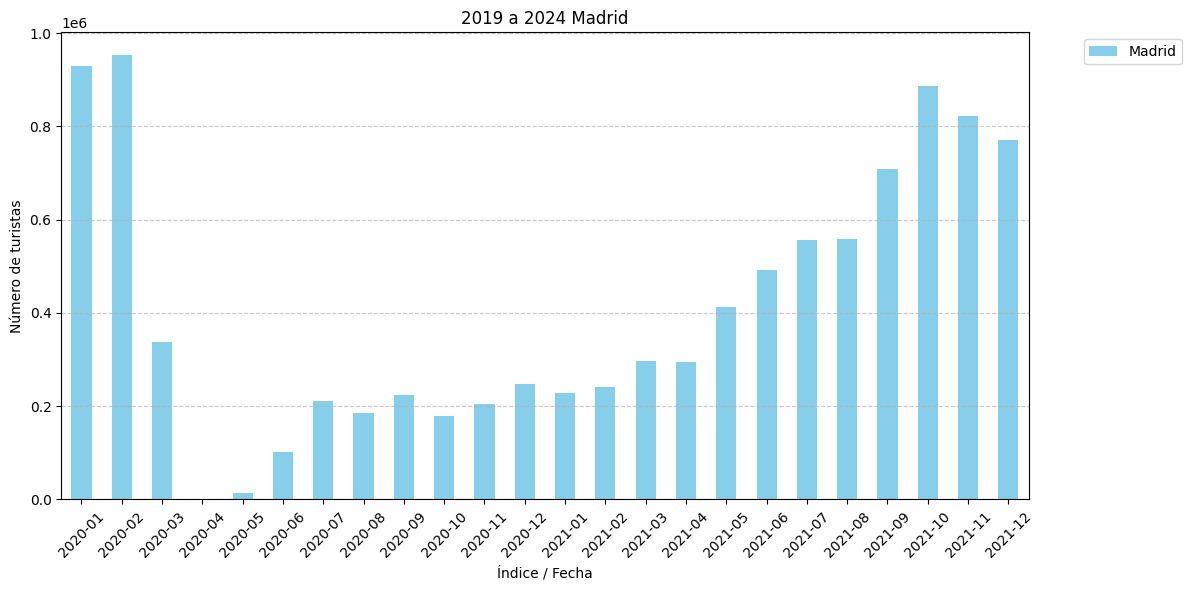

In [68]:
covid.plot(kind='bar', stacked=True, figsize=(12, 6), color='skyblue')
plt.title("2019 a 2024 Madrid")
plt.xlabel("Índice / Fecha")
plt.ylabel("Número de turistas")
plt.xticks(rotation=45)  # Rotar etiquetas 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()  # Ajustar automáticamente la disposición del gráfico
plt.show()

# ¿El turismo en España es mas de Paseo o Excursion?

In [70]:
tipologia = pd.read_excel("./src/data/tipologia_viaje.xlsx") #Importa el archivo
tipologia.columns=tipologia.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pd.options.display.float_format = '{:.1f}'.format #Los valores venian con anotacion cientifica y confirma el formato float y redondea a un decimal


In [71]:
tipologia

,,2025 01,2024 12,2024 11,2024 10,2024 09,2024 08,2024 07,2024 06,2024 05,...,2016 07,2016 06,2016 05,2016 04,2016 03,2016 02,2016 01,2015 12,2015 11,2015 10
0,Dato base,8147788.0,8779950.0,9053630.0,12919686.0,13310160.0,16621567.0,15957871.0,12483868.0,13088646.0,...,14103246.0,10882964.0,10409297.0,9254452.0,7684502.0,6254862.0,6133318.0,6417639,6429628,9940966
1,Tasa de variación anual,12.5,2.7,12.3,9.7,6.4,7.3,8.0,8.8,12.0,...,7.0,7.5,4.3,5.6,10.6,6.7,4.0,3.8,4.4,5.2
2,Acumulado en lo que va de año,8147788.0,137640110.0,128860160.0,119806530.0,106886844.0,93576684.0,76955117.0,60997245.0,48513377.0,...,64722641.0,50619395.0,39736431.0,29327134.0,20072683.0,12388180.0,6133318.0,,,
3,Tasa de variación acumulada,12.5,9.4,9.9,9.8,9.8,10.3,10.9,11.7,12.5,...,6.5,6.4,6.1,6.8,7.3,5.3,4.0,,,
4,Turista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Dato base,5065094.0,5264375.0,5670219.0,8961932.0,9602015.0,10929584.0,10852347.0,9299574.0,9255985.0,...,9545792.0,7552758.0,7111154.0,6086327.0,4627206.0,3678726.0,3526537.0,3512914,3754802,6432341
6,Tasa de variación anual,6.1,1.1,10.4,9.5,9.2,7.3,7.3,11.9,11.5,...,10.0,12.9,8.2,11.6,15.4,13.9,11.0,7.9,10.6,8.9
7,Acumulado en lo que va de año,5065094.0,93759297.0,88494922.0,82824703.0,73862771.0,64260756.0,53331172.0,42478825.0,33179251.0,...,42128500.0,32582708.0,25029951.0,17918796.0,11832469.0,7205263.0,3526537.0,,,
8,Tasa de variación acumulada,6.1,10.1,10.7,10.7,10.8,11.1,11.9,13.2,13.5,...,11.4,11.8,11.5,12.9,13.6,12.5,11.0,,,
9,Excursionista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿El turismo de negocios va en aumento o en disminucion?

In [72]:
motivo = pd.read_excel("./src/data/motivo_viaje.xlsx")
motivo.columns=motivo.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
motivo = motivo.transpose()
motivo= df.groupby("Ocio, recreo y vacaciones")

NameError: name 'df' is not defined

In [ ]:
motivo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
,Dato base,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,"Ocio, recreo y vacaciones",Dato base,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,"Negocio, motivos profesionales",Dato base,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,Otros motivos,Dato base,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada
2025 01,5065094.0,6.1,5065094.0,6.1,NaN,4119870.0,5.1,4119870.0,5.1,NaN,244325.0,7.7,244325.0,7.7,NaN,700898.0,11.6,700898.0,11.6
2024 12,5264375.0,1.1,93759297.0,10.1,NaN,4257518.0,2.0,81049012.0,9.9,NaN,287335.0,2.6,5148452.0,6.7,NaN,719521.0,-4.7,7561833.0,15.1
2024 11,5670219.0,10.4,88494922.0,10.7,NaN,4622268.0,10.5,76791494.0,10.3,NaN,463667.0,6.5,4861117.0,6.9,NaN,584284.0,12.8,6842312.0,17.7
2024 10,8961932.0,9.5,82824703.0,10.7,NaN,7796628.0,11.4,72169226.0,10.3,NaN,525253.0,-13.4,4397450.0,7.0,NaN,640051.0,9.9,6258028.0,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016 02,3678726.0,13.9,7205263.0,12.5,NaN,2814264.0,8.2,5486263.0,6.6,NaN,441059.0,45.2,788935.0,33.9,NaN,423403.0,30.9,930065.0,38.9
2016 01,3526537.0,11.0,3526537.0,11.0,NaN,2671999.0,5.0,2671999.0,5.0,NaN,347876.0,21.8,347876.0,21.8,NaN,506662.0,46.3,506662.0,46.3
2015 12,3512914,7.9,,,NaN,2631906,-1.4,,,NaN,301888,33.2,,,NaN,579120,61.1,,
2015 11,3754802,10.6,,,NaN,2926298,4.0,,,NaN,393014,33.9,,,NaN,435490,51.0,,


# ¿Los turistas de ciertos países gastan más dinero en España que otros?

In [ ]:
pais = pd.read_excel("./src/data/Gasto_segun_paisxlsx.xlsx")
pais.columns=pais.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
# pais = pais.transpose()

In [ ]:
pais

,,2025 01,2024 12,2024 11,2024 10,2024 09,2024 08,2024 07,2024 06,2024 05,...,2016 07,2016 06,2016 05,2016 04,2016 03,2016 02,2016 01,2015 12,2015 11,2015 10
0,Gasto total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dato base,7132.0,7590.3,7707.7,11898.7,12613.0,15364.4,15513.3,12356.8,11686.9,...,10238.5,7817.4,6917.9,5628.0,4624.5,3706.3,3737.3,3773.3,3872.8,6280.6
3,Reino Unido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dato base,1096.1,1096.4,1156.8,2124.2,2451.0,3026.0,2846.6,2481.8,2193.7,...,2197.0,1766.6,1495.2,1153.2,924.0,690.2,609.0,731.7,659.1,1336.4
5,Países Nórdicos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Dato base,618.4,628.9,687.4,785.4,598.4,522.3,1041.2,614.2,513.2,...,817.7,418.7,384.2,464.0,536.8,473.4,493.3,426.9,469.3,526.2
7,Resto del Mundo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Dato base,3798.5,3918.7,3996.3,6000.8,6441.7,7101.1,7890.9,6615.8,6187.4,...,4547.4,3651.8,3117.1,2415.1,1981.1,1629.3,1739.3,1740.2,1773.9,2626.5
9,Alemania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ¿Algunas comunidades autónomas han experimentado un crecimiento más acelerado en el número de turistas que otras?

In [ ]:
sector = pd.read_excel("./src/data/Gasto_por_sector.xlsx")

In [ ]:
sector

,,2022(A),2021(P),2020,2019,2018,2017,2016
0,A: Productos característicos del turismo,61483.7,24481.7,15345.6,58853.0,56185.2,53153.9,47704.1
1,1A: Hoteles y similares,17406.1,7168.6,4004.6,19430.4,17852.3,15792.9,14177.2
2,1B: Servicios de alquiler inmobiliario,5797.7,2276.4,764.9,5289.2,5124.4,5066.9,4277.1
3,2: Servicios de provisión de alimentos y bebidas,10653.8,4419.1,2329.7,10380.1,10393.5,10054.5,9123.3
4,3: Servicios de transporte de pasajeros por fe...,937.1,260.8,167.9,600.9,979.2,1045.4,874.9
5,4: Servicios de transporte de pasajeros por ca...,1421.5,674.4,365.7,1365.2,1770.9,1816.7,1642.0
6,5: Servicios de transporte de pasajeros por agua,463.3,66.7,79.6,281.2,333.1,384.6,329.6
7,6: Servicios de transporte aéreo de pasajeros,7645.2,2408.0,3111.8,6005.6,6034.5,5675.3,4886.9
8,7: Servicios de alquiler de equipos de transporte,2283.5,1079.3,531.9,1456.6,695.1,684.0,666.0
9,8: Agencias de viajes y otros servicios de res...,1357.2,419.8,538.4,1608.5,1452.8,1882.9,1819.9
